Predicting Salaries with Decision Trees
=======================================


![Title](~/img/tree_5000_blank.png)

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sklern - powerful machine learning library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree


Matplotlib is building the font cache; this may take a moment.


In [2]:
#Field names (column names) for the datasets
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)


Read a CSV data file.

In [7]:
df = pd.read_csv('adult.data', names=attribute_names, sep=', ', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary-class    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Pre-process the data.  First, remove unwanted variables.

In [9]:
excludes = (
    'fnlwgt', 
    'education-num',
    'capital-gain', 
    'capital-loss'
)
#run a loop through the tuple to delete the unwanted variables
for attri in excludes:
    del df[attri]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


Boolean variables to 0s and 1s.

In [11]:
booleans = (
    'sex', 
    'native-country', 
    'salary-class'
)
#converting the boolean variables into 0s and 1s using the category method and the cat.codes method
#by making the variables equate to themselves and converting them to codes

for attr in booleans:
    #casting the columns to a categorical data type - Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.
    df[attr] = df[attr].astype('category')
    #assign codes to the category - https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    df[attr] = df[attr].cat.codes
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0


 One-hot encoding of all categorical attributes.

In [13]:
#one-hot encoding of all categorical attributes (qualitatative)
categoricals = (
    'workclass', 
    'education', 
    'marital-status', 
    'occupation', 
    'relationship', 
    'race'
)

#convert all the categories that satisfy the condition into binary numbers 1 for true, 0 for false
#pd.get_dummies(df['occupation'], prefix='occupation') - Convert categorical variable into dummy/indicator variables.
for attr in categoricals:
    #concatenate originl dataframe with the one-hot encoding method
    df = pd.concat([df, pd.get_dummies(df[attr], prefix=attr)], axis=1)
    
    #delete the categoricals attributs since we no longer need them
    del df[attr]
df.head()

,age,sex,hours-per-week,native-country,salary-class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


Extract attributes (X) and class labels (y).

In [16]:
#extract the class labels for y
#assign the salary class attribute to a variable to use for reference later
y = df['salary-class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: salary-class, dtype: int8

In [17]:
#copy dataframe
X = df.copy()
#drop the salary class attribute (column) - we would use this as reference to predict the salaries
X = df.drop(columns="salary-class")
X.head()

,age,sex,hours-per-week,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


Split dataset into training and testing subsets.

In [22]:
# The library sktlearn  is going to do all the hardwork
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size = 0.33,
    # the idea is that we want it choose the examples at random but we want it to be the same random pick
    random_state=0
)   
#we want to see the size of those dataframes using shape method
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

#format
#x_cap_train(<number of rows>, <number of columns>)
#there was a thwo-thirds to one-thirds split

X_train  (21815, 62)
X_test  (10746, 62)
y_train  (21815,)
y_test  (10746,)


Construct a decision tree from this training data.

In [23]:
#call the Decisition Tree class
clf = DecisionTreeClassifier(
    #define randomness, but get the same set of examples randomly
    random_state=0,
    criterion='entropy'
    
)
#fit the split train data into the decision tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict target class for the training set.

In [45]:
#use predict method converts it to a numpy array
#predict trained data
y_train_pred = clf.predict(X_train)
#picking the first 10 rows
print(y_train_pred[0:10])
#get accuracy score
train_acc = accuracy_score(y_train, y_train_pred)
print("Train: ", train_acc)

[0 0 0 0 0 0 0 0 0 0]
Train:  0.8215906486362594


Predict target class for the testing set.

In [46]:
#use predict method converts it to a numpy array
y_test_pred = clf.predict(X_test)
print(y_test_pred[0:10])
#get accuracy score for testing subset of the salary-class against the predicted testing subset of the other attributes 
test_acc = accuracy_score(y_test, y_test_pred)
print("Test: ", test_acc)

[0 0 0 0 0 1 0 0 0 0]
Test:  0.8188163037409268


Check if dataset is balanced.

In [42]:
#0 - salaries less than $50k
#1 - salaries more than $50k
df['salary-class'].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

Prune the decision tree.

min_samples_split =  2
[0 1 0 0 0 0 0 0 1 0]
Train:  0.9731377492550997
[0 0 0 1 0 0 0 0 0 0]
Test:  0.7787083565978038
min_samples_split =  3
[0 1 0 0 0 0 0 0 0 0]
Train:  0.9588815035526014
[0 0 0 1 0 0 0 0 1 0]
Test:  0.7846640610459706
min_samples_split =  5
[0 1 0 0 0 0 0 1 0 0]
Train:  0.9442126976850791
[0 0 0 0 0 0 0 0 0 0]
Test:  0.7877349711520566
min_samples_split =  10
[0 0 0 0 0 0 0 1 1 0]
Train:  0.918771487508595
[0 0 0 0 0 0 0 0 1 0]
Test:  0.7944351386562442
min_samples_split =  20
[0 0 0 0 0 0 0 1 1 0]
Train:  0.893651157460463
[0 0 0 0 0 0 0 0 1 0]
Test:  0.8078354736646194
min_samples_split =  50
[0 0 0 0 0 0 0 1 1 0]
Train:  0.8680724272289709
[0 0 0 0 0 0 0 0 1 0]
Test:  0.8153731621068304
min_samples_split =  100
[0 0 0 0 0 0 0 1 1 0]
Train:  0.856429062571625
[0 0 0 0 0 0 0 0 1 0]
Test:  0.8237483714870649
min_samples_split =  250
[0 0 0 0 0 0 0 0 1 0]
Train:  0.8407059362823746
[0 0 0 0 0 0 0 0 0 0]
Test:  0.8238414293690676
min_samples_split =  500
[0 0 0 0 0 

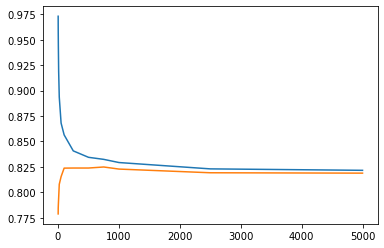

In [44]:
#Trim down the tree is called pruning and we are pruning the tree to improve the accuracy
sizes = [2,3,5,10,20, 50, 100,250,500,750,1000,2500,5000]
train_accs = []
test_accs = []

for s in sizes:
    clf = DecisionTreeClassifier(
        #define randomness
        random_state=0,
        criterion='entropy',
        min_samples_split = s
    )
    clf.fit(X_train, y_train)
    
    print("min_samples_split = ", s)
    y_train_pred = clf.predict(X_train)
    #picking the first 10 rows
    print(y_train_pred[0:10])
    #get accuracy score
    train_acc = accuracy_score(y_train, y_train_pred)
    print("Train: ", train_acc)
    
    #use predict method converts it to a numpy array
    y_test_pred = clf.predict(X_test)
    print(y_test_pred[0:10])
    #get accuracy score for testing subset of the salary-class against the predicted testing subset of the other attributes 
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test: ", test_acc)
    
    #append to the list above
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
#plotting the graph based on the sizes of the training accuracies
plt.plot(sizes, train_accs)
#plotting the graph based on the sizes of the testing accuracies
plt.plot(sizes, test_accs)

#blue curve - is the training accuracy
#orange curve - should be our testing accuracy
plt.show()

Graphical representation of a decision tree.

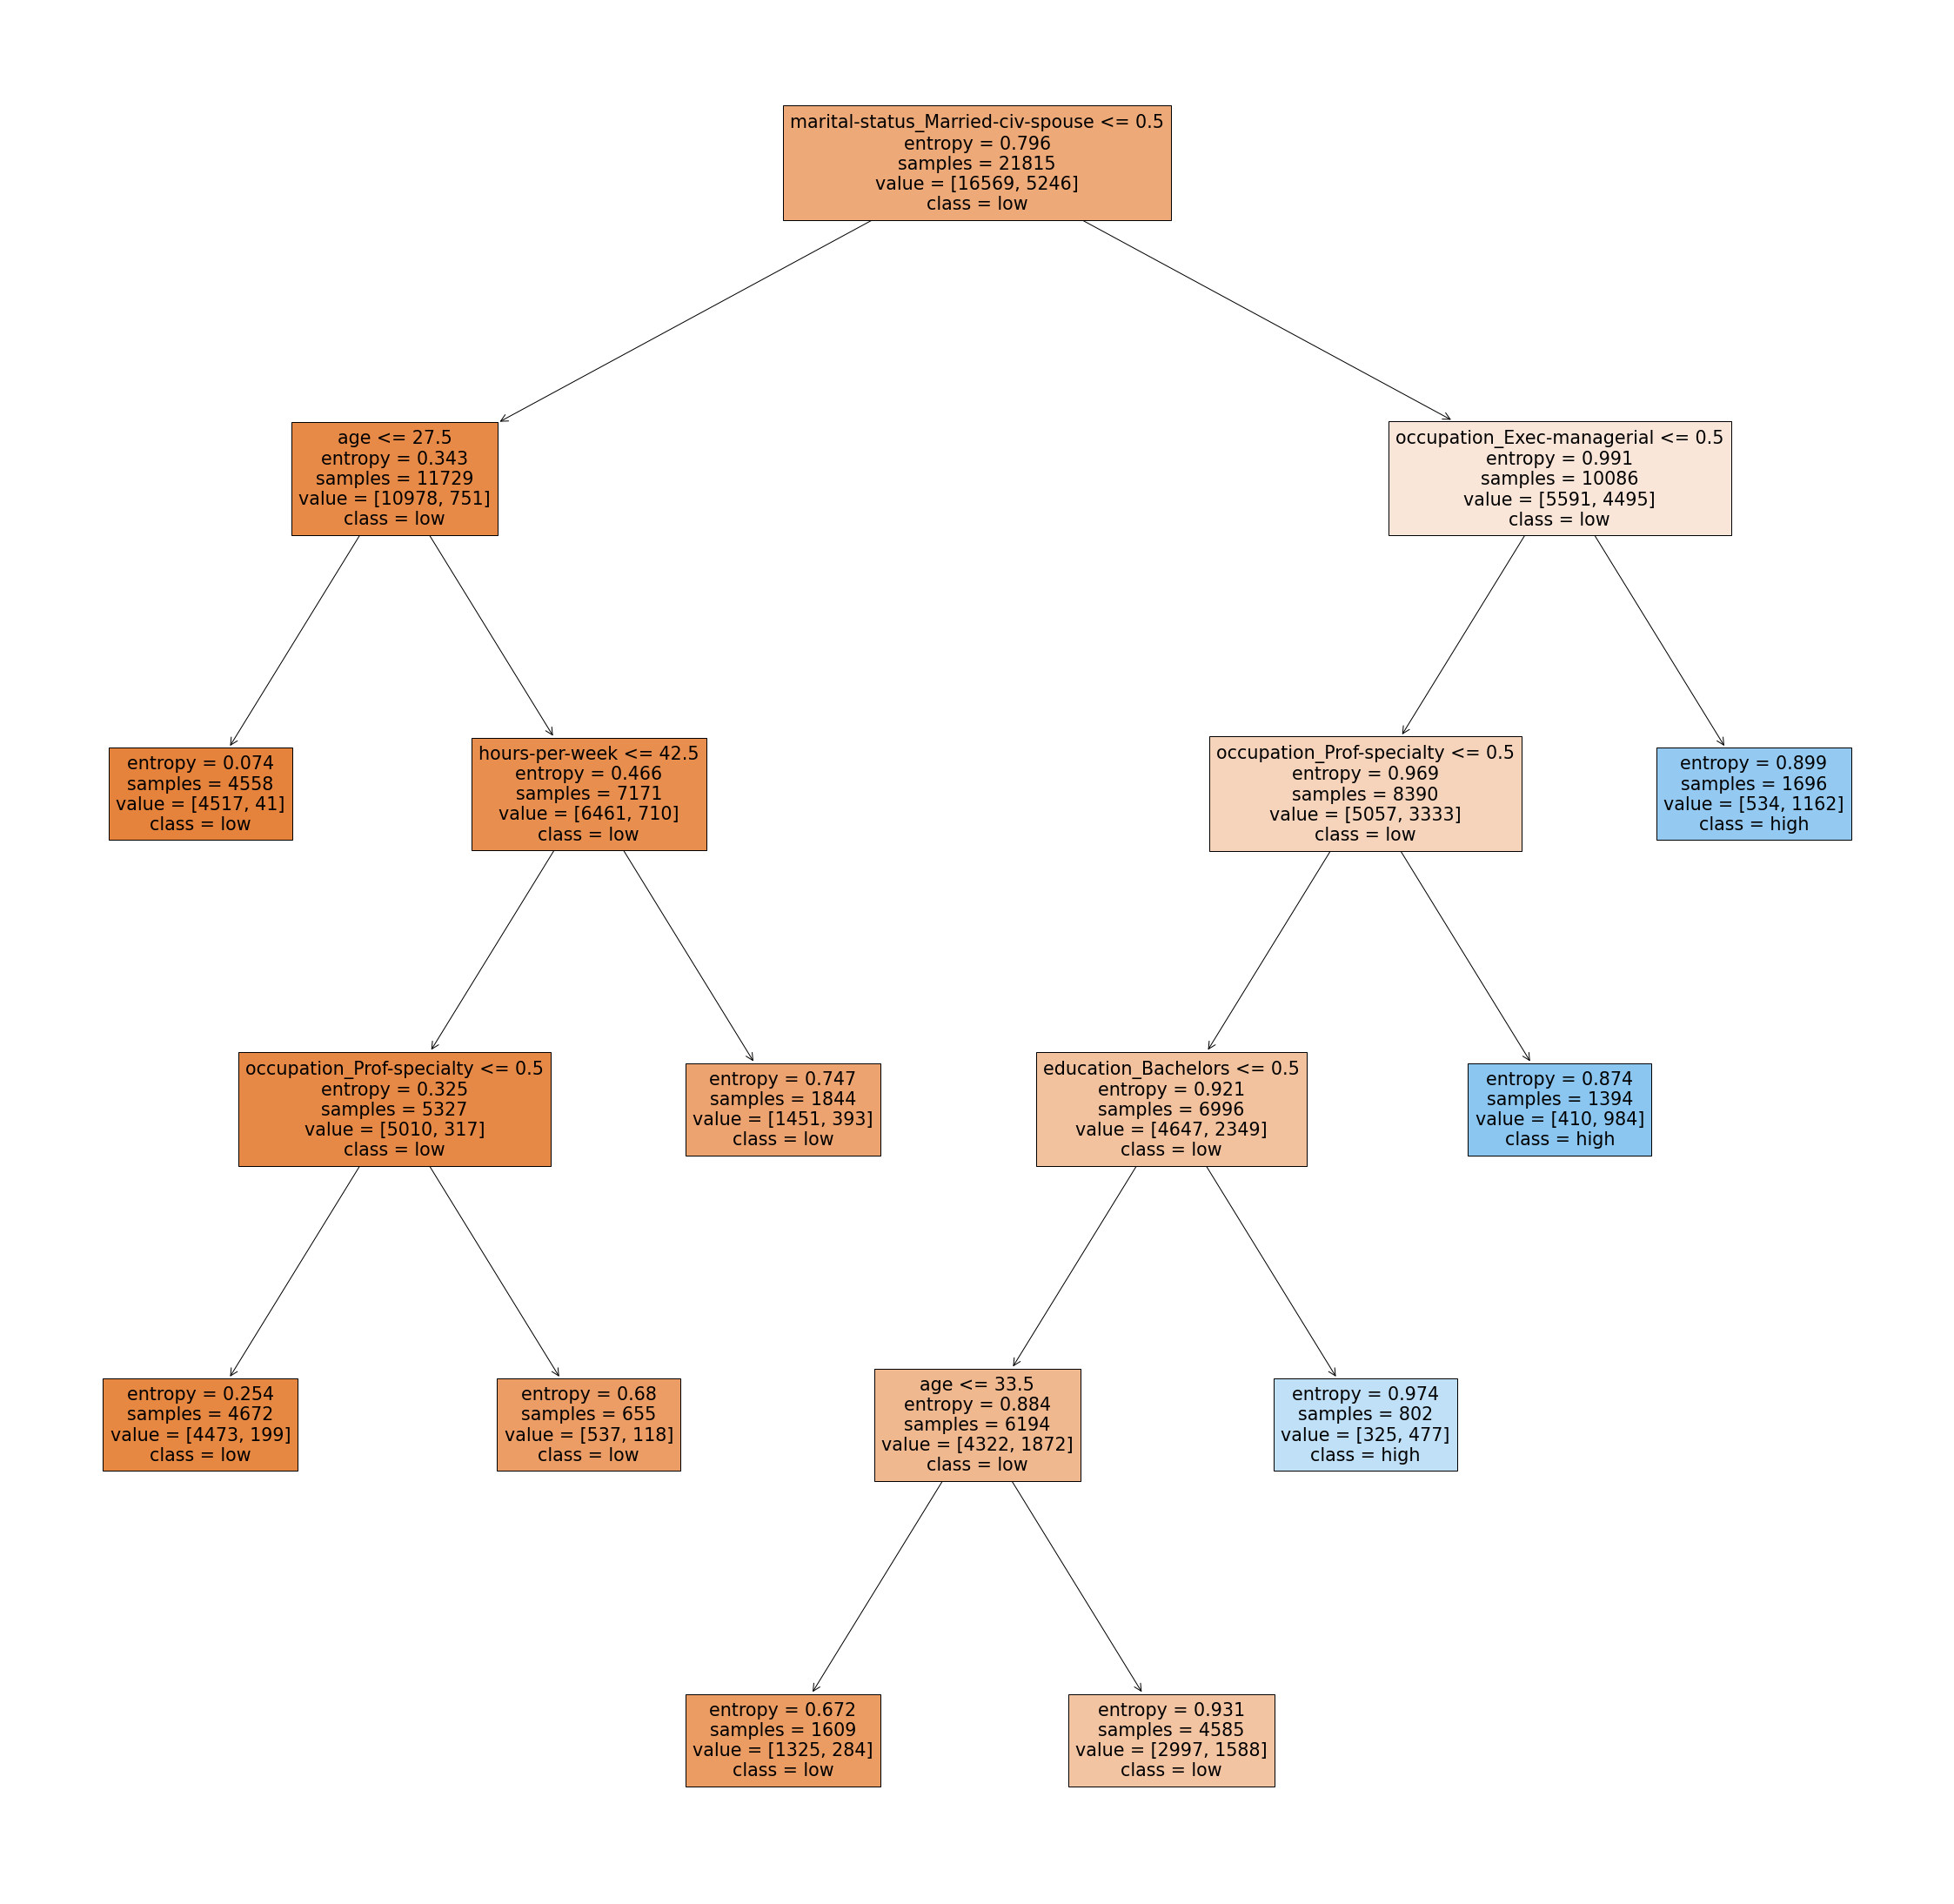

In [36]:
#call the decision tree class and build the decision tree 
clf = DecisionTreeClassifier(
    min_samples_split=5000,
    #entropy - defines how mixed up the two classes are
    criterion="entropy",
    random_state=0
)
#fit the training data into the decision tree
clf.fit(X_train, y_train)

#render the tree into an image
fig = plt.figure(figsize=(40,40))

#using the plot_tree function sklearn
p = tree.plot_tree(
    #decision tree
    clf,
    filled=True,
    #pull the attributes from our trained data and convert them to a list
    feature_names = X_train.columns.to_list(),
    #class_names = low - low salary, 
    #              high - high salary
    class_names=("low","high")
)
#export tree into another file
fig.savefig("tree_one.png")

#on the tree
#root - marital status is the best prodictor of salary
#entropy - defines how mixed up the two classes so it ranges from 0 (if there is only one salary class) to 1 (if there are equal number of examples from both salary classes). 
           #This value is used to determine which attribute to split on
#color scheme - ranges from dark orange to light blue which predominatly ranges from low salary to high salary
#samples - how many samples there are in total in this set
#value - provides you the breakdown of the high versus low salary